<a href="https://colab.research.google.com/github/Motunrayo244/EDISS-MP/blob/main/Data%20Science/Project_work/Project2/Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project II – Students Performance

### Project description
The data was collected from a fully online nine-week-long course on machine learning, hosted on the online learning management system Moodle. The goal of this project is to use two different supervised learning approaches  to predict students’ final grade in an online course.

### Data Description
 The dataset contained anonymized informaon of 107 enrolled students. The data included students’ grades (from 3 mini projects, 3 quizzes and 3 peer reviews and the final overall grade) as well as the course logs. The deadline for the three mini projects fell within weeks 3, 5 and 8 of the course, whereas the deadline for the quizzes fell within weeks 2, 4 and 8.  
 - Status0: relates to course, lectures, contents viewed/ started.
 - Status1: relates to assignment i.e quiz attempted, submitted and/or reviewed,
 - Status2: relates to grade and report viewes (Grade user report viewed, Grade overview report viewed, User graded, Grade deleted, User profile viewed, Recent acvity viewed, User report viewed, Course user report viewed, Outline report viewed)
 - Status3: relates to forum activities(Post updated, Post created,

 Data:
 --  9 grades (Week2_Quiz1, Week3_MP1, ... Week7_MP3) •
 -- 36 logs (Week1_Stat0, Week1_Stat1, Week1_Stat2, Week1_Stat3, ... Week9_Stat0, Week9_Stat1, Week9_Stat2, Week9_Stat3).

 The data was uploaded to  https://raw.githubusercontent.com/Motunrayo244/EDISS-MP/main/Data%20Science/Project_work/Project2/MP2_Data.csv







### Step I - Data Preprocessing

The data has 48 columns

- Student ID
- 3 quiz grade (Week 2, 4 and 8)
- 3 mini project grade (Week 3,5, and 7)
- 3 Pair review grade(Week 3,5, and 7)
- 36 log data giving information about the student interaction with lessons, modules, assignments, grade reports, and forum activities. This logs consists of 4 key items and are reported for 9 weeks.
- Week8_Total
and
- Grade: the final grade of the student
The dataset contains 107 student records.
There are no columns with null/empty values.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches
from time import time

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, fbeta_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



import warnings
warnings.filterwarnings('ignore')


In [ ]:
st_df = pd.read_csv('https://raw.githubusercontent.com/Motunrayo244/EDISS-MP/main/Data%20Science/Project_work/Project2/MP2_Data.csv')

In [ ]:
# Shows the first six records in the dataset. Note the values in the Grade column are not arranged serially
st_df.head(6)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2
5,ML-2020-7,3.33,14.0,5.0,14.78,5.00,15.51,5.0,4.67,4.5,...,3,12,0,0,0,7,2,0,0,3


In [ ]:
#shows a list of value in the Grade column
print(st_df.Grade.unique()) # list of unique values in Grade columnn
print(list(st_df.Grade))

[4 3 2 0 5]
[4, 4, 3, 3, 2, 3, 0, 5, 4, 3, 0, 0, 5, 5, 4, 5, 4, 4, 0, 0, 0, 3, 4, 0, 4, 3, 2, 3, 0, 4, 3, 5, 0, 0, 4, 0, 5, 3, 0, 3, 4, 5, 3, 5, 4, 4, 3, 4, 2, 5, 4, 3, 5, 4, 2, 5, 2, 0, 0, 4, 0, 0, 3, 4, 3, 0, 4, 3, 0, 3, 4, 5, 4, 4, 5, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
st_df.shape # the dimension of the datasate. the dataset has 107 records and 48 features

(107, 48)

In [ ]:
# Shows infomation about the column in the dataset and the number of null counts.
# The count of all non-null columns equals to the number of records in the dataframe, hence the dataset has no missing values in any column.
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

In [ ]:
# shows a statistical distribution of each feature in the dataset
st_df.describe()

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week8_Total,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2.406636,7.949626,2.803738,9.237757,2.844673,14.481869,2.383178,2.609439,2.663551,47.380467,...,1.252336,10.514019,3.130841,1.112150,0.355140,7.663551,1.607477,1.093458,0.046729,2.074766
std,2.000317,6.892312,2.493158,8.640610,2.482099,14.080211,2.437501,2.229419,2.414359,41.035589,...,2.399267,15.563846,4.841028,3.658351,1.191577,9.277630,2.687346,3.368928,0.483368,1.993863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.330000,12.000000,5.000000,10.870000,5.000000,15.910000,2.500000,3.170000,4.000000,71.530000,...,0.000000,5.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,3.000000
75%,4.170000,14.305000,5.000000,18.045000,5.000000,27.440000,5.000000,4.710000,5.000000,83.550000,...,2.000000,14.000000,5.000000,0.000000,0.000000,11.000000,2.000000,0.500000,0.000000,4.000000
max,5.000000,15.000000,5.000000,20.000000,5.000000,35.000000,5.000000,5.000000,5.000000,99.710000,...,12.000000,90.000000,27.000000,22.000000,9.000000,62.000000,12.000000,25.000000,5.000000,5.000000


In [ ]:
# ensures that there are no null columns in any column
for col in list(st_df.columns):
  print(f" {col}:  {st_df[col].isnull().sum()}")

 ID:  0
 Week2_Quiz1:  0
 Week3_MP1:  0
 Week3_PR1:  0
 Week5_MP2:  0
 Week5_PR2:  0
 Week7_MP3:  0
 Week7_PR3:  0
 Week4_Quiz2:  0
 Week6_Quiz3:  0
 Week8_Total:  0
 Week1_Stat0:  0
 Week1_Stat1:  0
 Week1_Stat2:  0
 Week1_Stat3:  0
 Week2_Stat0:  0
 Week2_Stat1:  0
 Week2_Stat2:  0
 Week2_Stat3:  0
 Week3_Stat0:  0
 Week3_Stat1:  0
 Week3_Stat2:  0
 Week3_Stat3:  0
 Week4_Stat0:  0
 Week4_Stat1:  0
 Week4_Stat2:  0
 Week4_Stat3:  0
 Week5_Stat0:  0
 Week5_Stat1:  0
 Week5_Stat2:  0
 Week5_Stat3:  0
 Week6_Stat0:  0
 Week6_Stat1:  0
 Week6_Stat2:  0
 Week6_Stat3:  0
 Week7_Stat0:  0
 Week7_Stat1:  0
 Week7_Stat2:  0
 Week7_Stat3:  0
 Week8_Stat0:  0
 Week8_Stat1:  0
 Week8_Stat2:  0
 Week8_Stat3:  0
 Week9_Stat0:  0
 Week9_Stat1:  0
 Week9_Stat2:  0
 Week9_Stat3:  0
 Grade:  0


In [ ]:
# drop the student ID because it has no impact on the model
df = st_df.drop(['ID'],axis=1, inplace=False)

In [ ]:
df.var() # the variance of each column in the data frame

Week2_Quiz1       4.001270
Week3_MP1        47.503968
Week3_PR1         6.215835
Week5_MP2        74.660146
Week5_PR2         6.160818
Week7_MP3       198.252342
Week7_PR3         5.941412
Week4_Quiz2       4.970311
Week6_Quiz3       5.829131
Week8_Total    1683.919557
Week1_Stat0      51.226944
Week1_Stat1       0.000000
Week1_Stat2       3.865279
Week1_Stat3       0.534121
Week2_Stat0     265.949568
Week2_Stat1     127.871980
Week2_Stat2       2.265914
Week2_Stat3      17.663199
Week3_Stat0     822.897549
Week3_Stat1      10.279492
Week3_Stat2       7.233645
Week3_Stat3       5.152530
Week4_Stat0    2224.473990
Week4_Stat1     290.384588
Week4_Stat2       7.789279
Week4_Stat3       7.877270
Week5_Stat0     970.900018
Week5_Stat1      43.141421
Week5_Stat2      15.640628
Week5_Stat3       3.319697
Week6_Stat0    2289.750132
Week6_Stat1     196.274907
Week6_Stat2      51.930347
Week6_Stat3       1.489684
Week7_Stat0     494.721742
Week7_Stat1      25.015870
Week7_Stat2      23.964733
W

<Axes: >

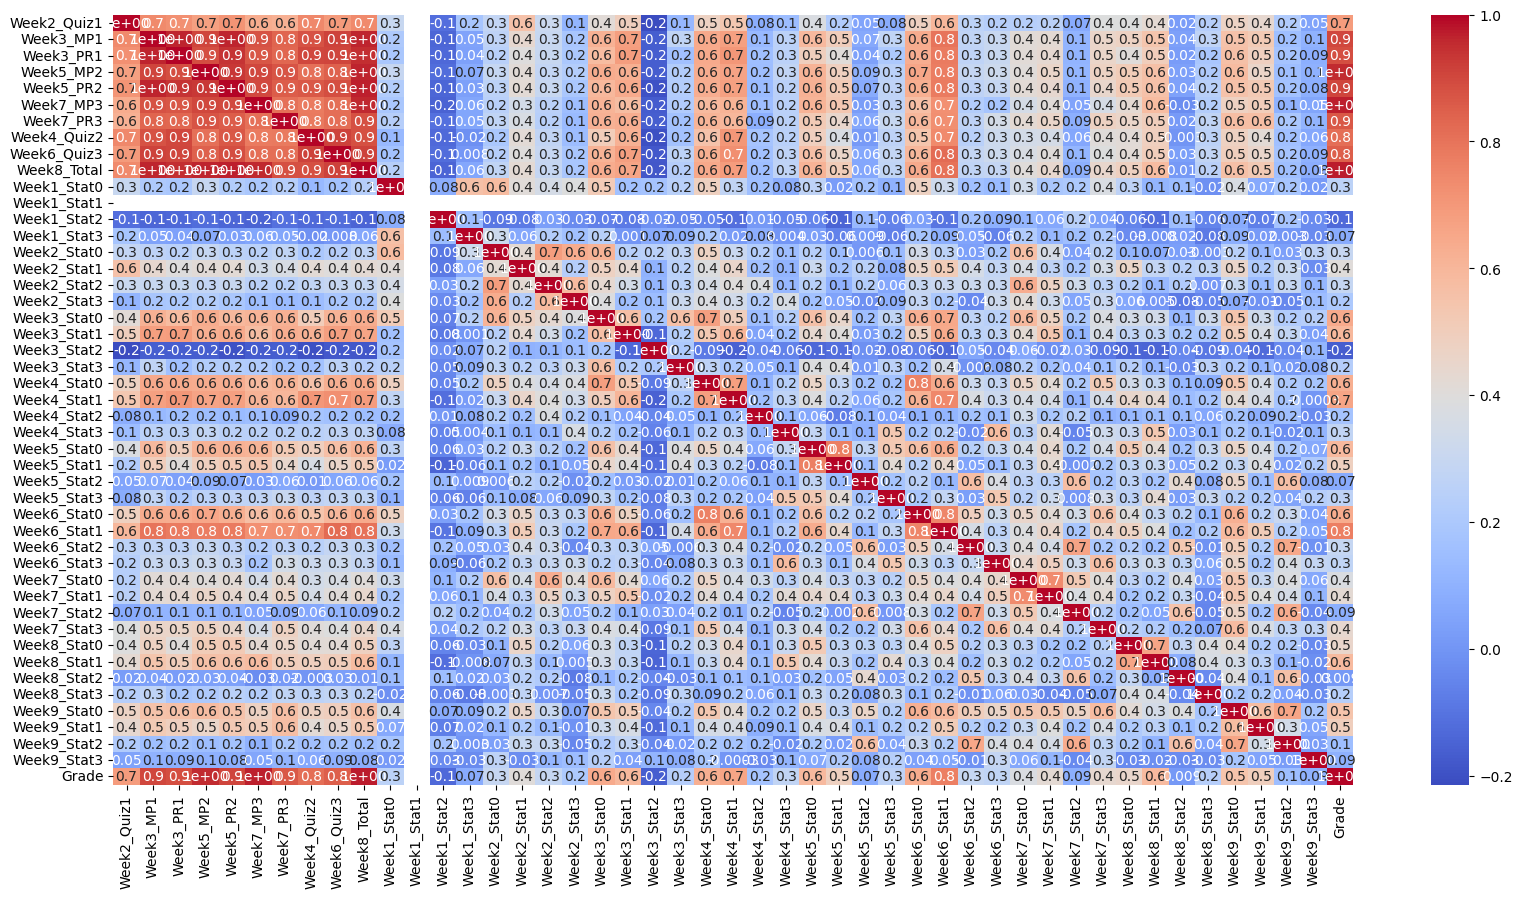

In [ ]:
# An heat map showing the correlation of every feature with eachother and with the target.
# warm color shows a high correlation while cool color shows a low correlation.
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt="0.1",cmap='coolwarm')

In [ ]:
df['Week1_Stat1'].unique() # Check the values of Week_stat1 because it has no corellation with any row.

array([0])

In [ ]:
# drop week1_stat1 feature as all records contain the same value
df.drop(['Week1_Stat1'],axis=1, inplace=True)

In [ ]:
df.columns # confirm that it was dropped

Index(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0',
       'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0',
       'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0',
       'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0',
       'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0',
       'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0',
       'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0',
       'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0',
       'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

In [ ]:
abs(df.corr()['Grade']) # shows the corellation of all the columns with the grade

Week2_Quiz1    0.689783
Week3_MP1      0.901788
Week3_PR1      0.887352
Week5_MP2      0.953488
Week5_PR2      0.907837
Week7_MP3      0.968130
Week7_PR3      0.865616
Week4_Quiz2    0.810920
Week6_Quiz3    0.849920
Week8_Total    0.972348
Week1_Stat0    0.256311
Week1_Stat2    0.129440
Week1_Stat3    0.072546
Week2_Stat0    0.293296
Week2_Stat1    0.406120
Week2_Stat2    0.292262
Week2_Stat3    0.202950
Week3_Stat0    0.643789
Week3_Stat1    0.596824
Week3_Stat2    0.162950
Week3_Stat3    0.227106
Week4_Stat0    0.625359
Week4_Stat1    0.662946
Week4_Stat2    0.171987
Week4_Stat3    0.278034
Week5_Stat0    0.590146
Week5_Stat1    0.484030
Week5_Stat2    0.073326
Week5_Stat3    0.264079
Week6_Stat0    0.635807
Week6_Stat1    0.771988
Week6_Stat2    0.288761
Week6_Stat3    0.270239
Week7_Stat0    0.377195
Week7_Stat1    0.424807
Week7_Stat2    0.087466
Week7_Stat3    0.439733
Week8_Stat0    0.450807
Week8_Stat1    0.584425
Week8_Stat2    0.009186
Week8_Stat3    0.234907
Week9_Stat0    0

<Axes: >

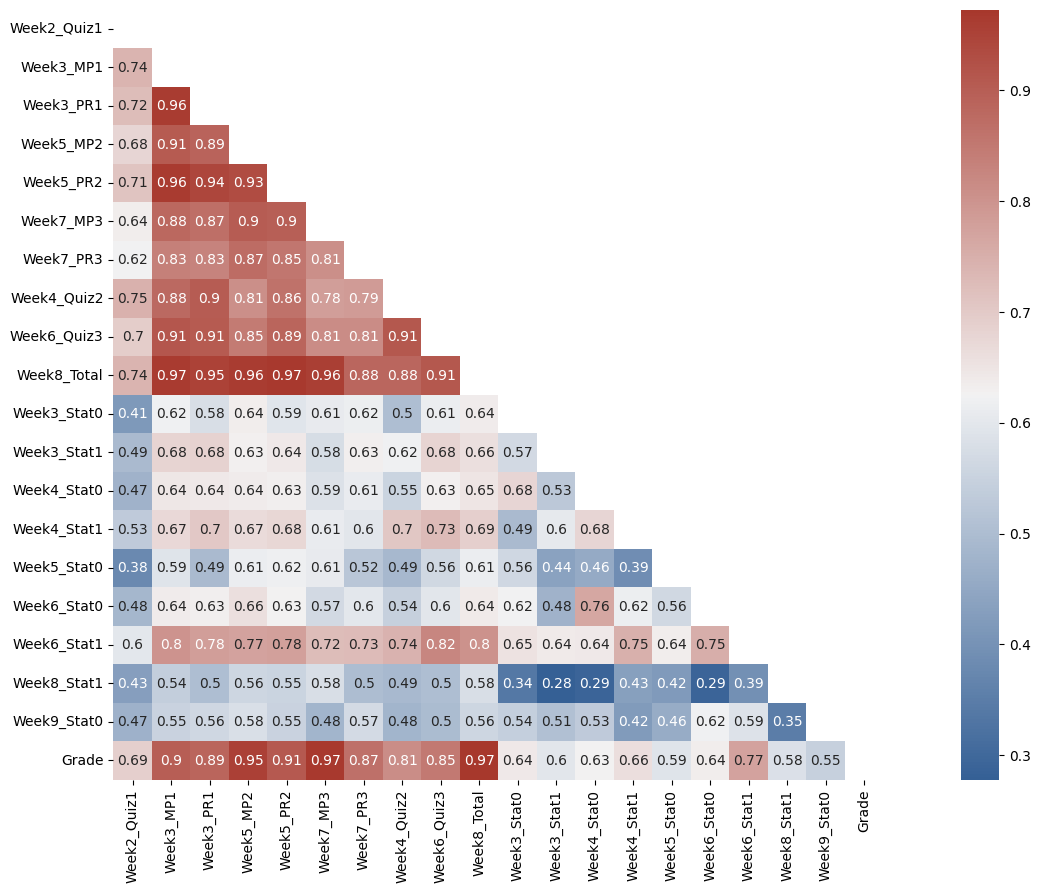

In [ ]:
# Remove all columns with a corellation less than or eual to 0.5.
high_corr = abs(df.corr()['Grade'][abs(df.corr()['Grade'])>0.5]).index.tolist()

#plot the heatmap of the columns left
plt.figure(figsize=(20, 10))
df = df[high_corr]
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt="0.2",cmap =cmap,square=True, mask=mask)

<Axes: xlabel='Grade', ylabel='count'>

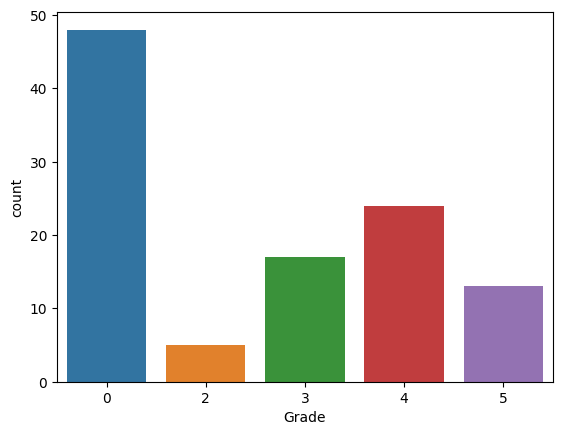

In [ ]:
# Shows the distribution of the classes
sns.countplot(data=df, x='Grade')

In [ ]:
df.shape

(107, 20)

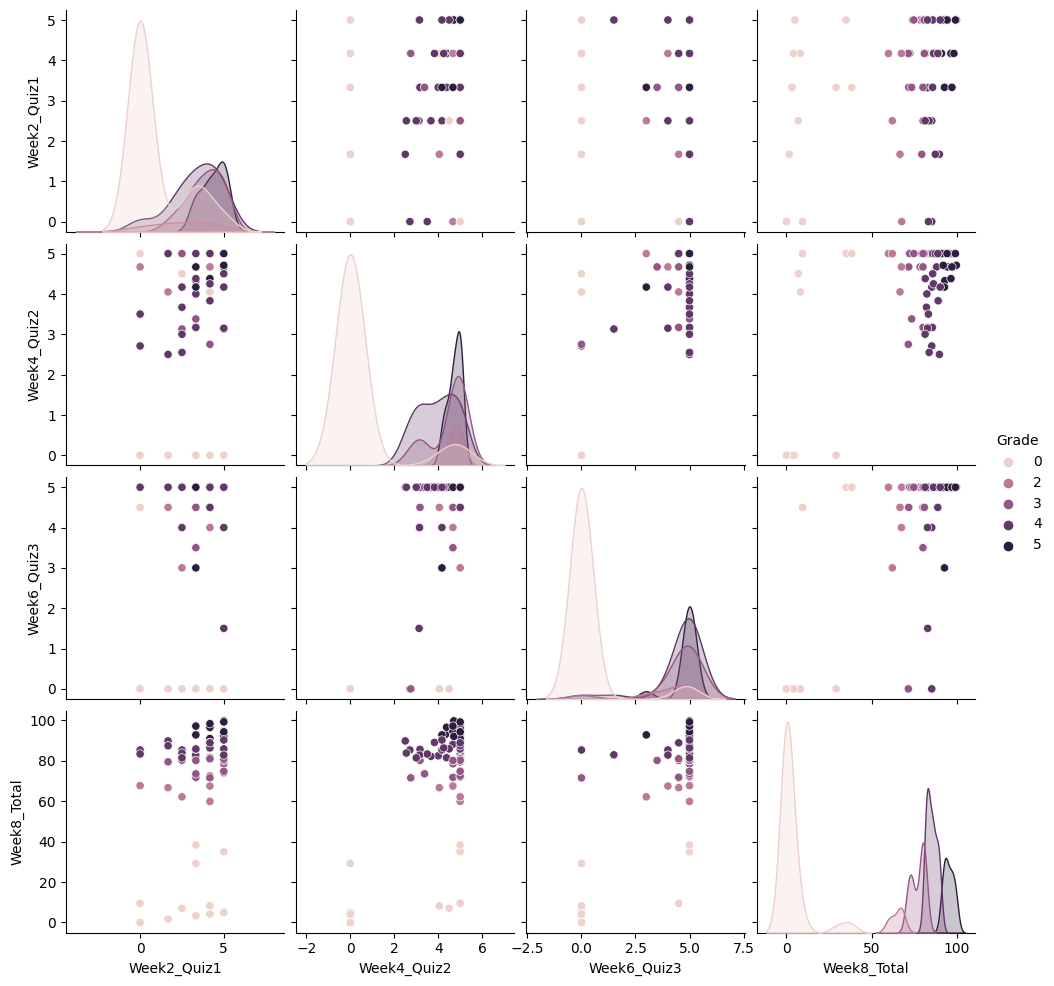

In [ ]:
# shows a pairplot of the quiz score and week 8 total withe the grade as hue
sns.pairplot(df[['Week2_Quiz1', 'Week4_Quiz2',  'Week6_Quiz3',  'Week8_Total', 'Grade']], hue = 'Grade')


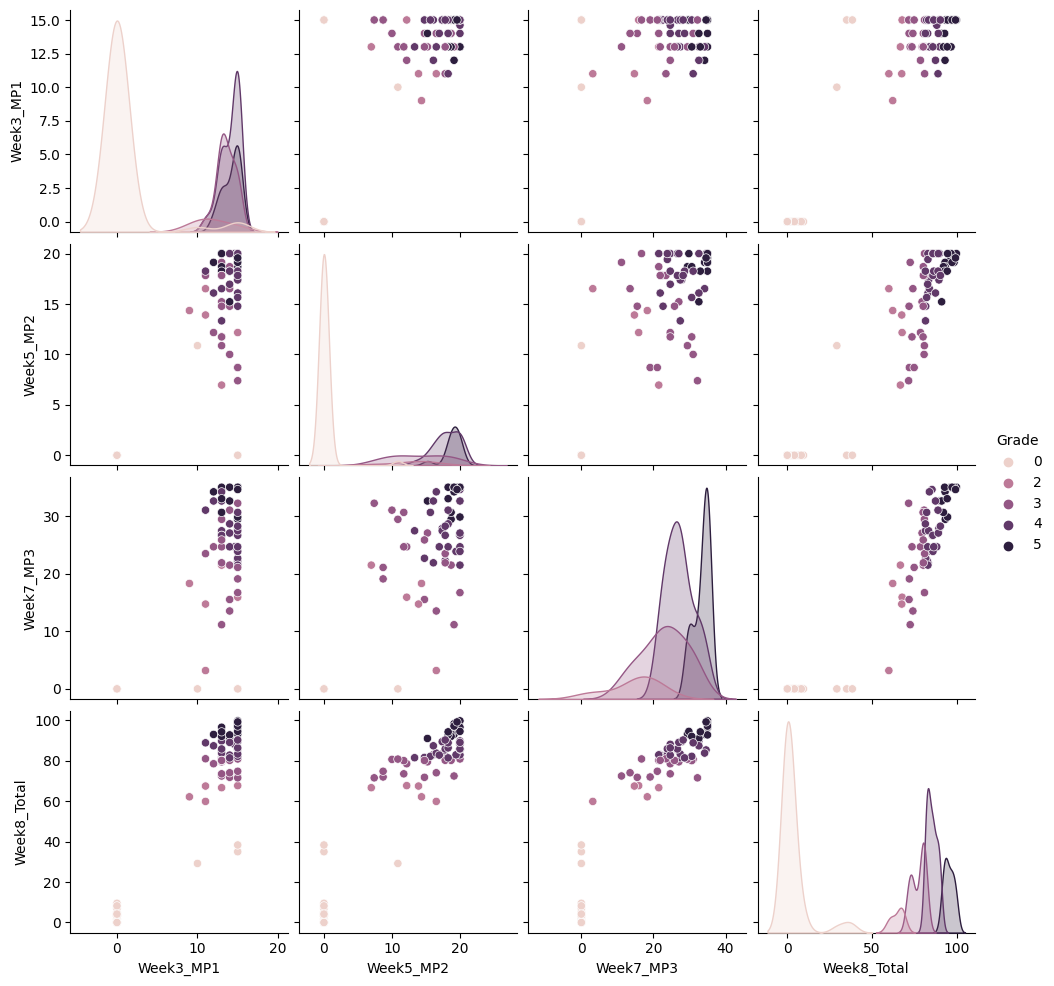

In [ ]:

# shows a pairplot of the Mini projects score and week 8 total withe the grade as hue
sns.pairplot(df[['Week3_MP1',  'Week5_MP2', 'Week7_MP3', 'Week8_Total', 'Grade']], hue = 'Grade')

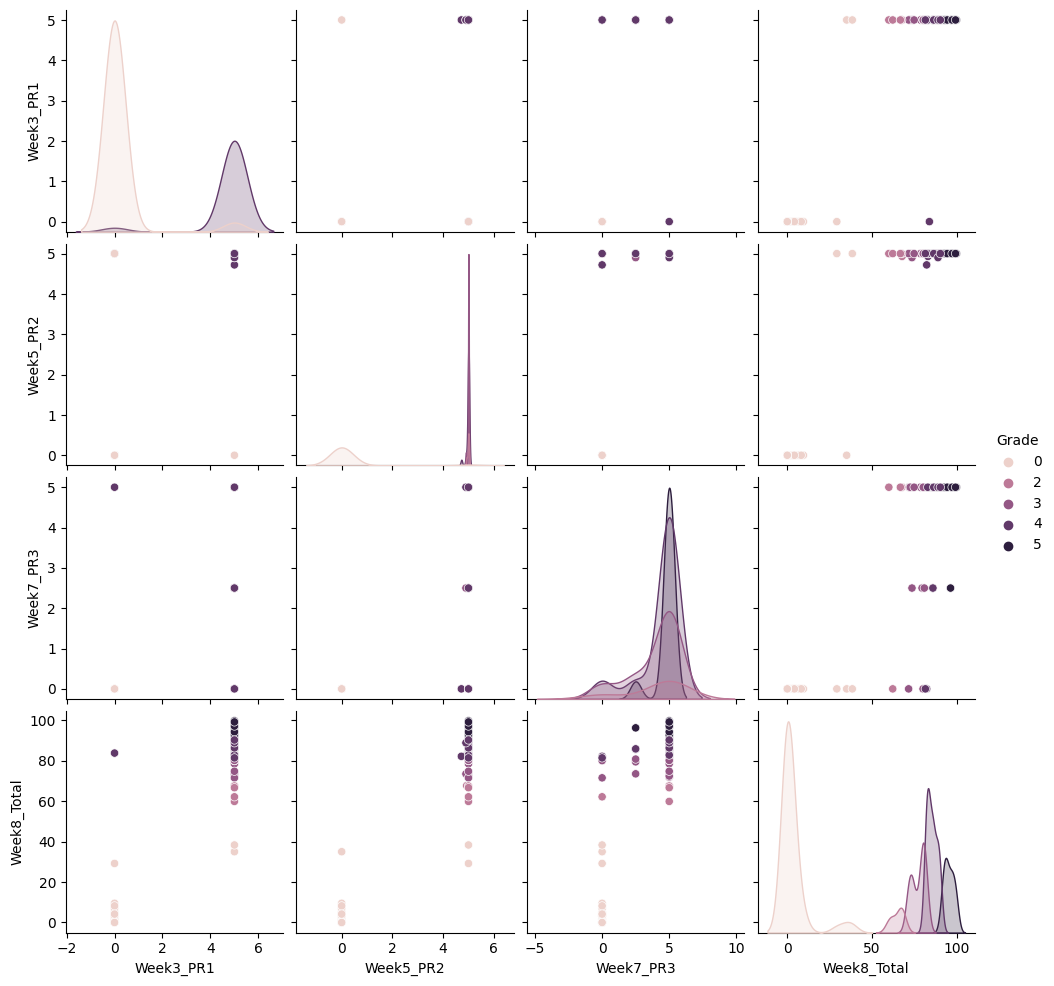

In [ ]:
# shows a pairplot of the peer review and week 8 total withe the grade as hue
sns.pairplot(df[['Week3_PR1', 'Week5_PR2', 'Week7_PR3', 'Week8_Total', 'Grade']], hue = 'Grade')

<Axes: xlabel='Grade', ylabel='Week8_Total'>

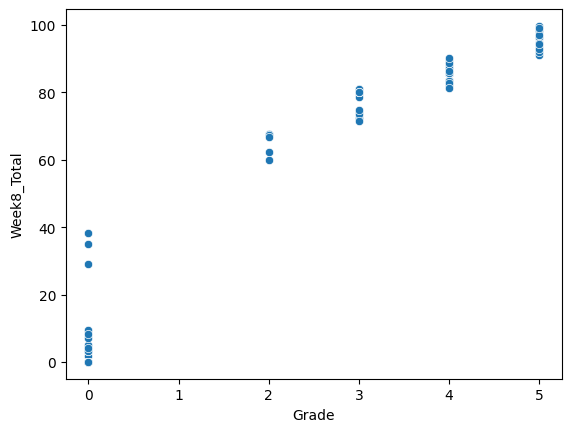

In [ ]:
sns.scatterplot(data= df, x='Grade', y='Week8_Total')

In [ ]:
df['sum_MP'] = df['Week3_MP1']+df['Week5_MP2'] + df['Week7_MP3']
df['sum_Qizzes'] =df['Week2_Quiz1'] +df['Week4_Quiz2'] + df['Week6_Quiz3']
df['sum_PR'] = df['Week3_PR1']+ df['Week5_PR2'] + df['Week7_PR3']

In [ ]:
# Check the correllation of the new columns with the grade
abs(df[['sum_MP','sum_Qizzes','sum_PR','Grade']].corr()['Grade'])

sum_MP        0.981128
sum_Qizzes    0.850059
sum_PR        0.925995
Grade         1.000000
Name: Grade, dtype: float64

In [ ]:
# drop the columns that make up the three columns as a significant information from them can be obtained from the new columns
df.drop(['Week3_MP1','Week5_MP2','Week7_MP3','Week2_Quiz1','Week4_Quiz2','Week6_Quiz3','Week3_PR1','Week5_PR2','Week7_PR3'], axis=1, inplace=True)

In [ ]:
df['Grade'] = df['Grade'].astype('category')

<Axes: >

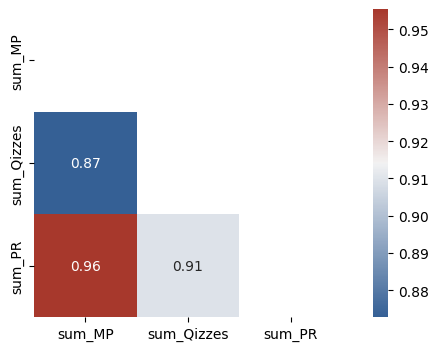

In [ ]:
plt.figure(figsize=(8, 4))
mask = np.triu(np.ones_like(df[['sum_MP','sum_Qizzes','sum_PR','Grade']].corr(), dtype=bool))
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
sns.heatmap(df[['sum_MP','sum_Qizzes','sum_PR','Grade']].corr(), annot=True, fmt="0.2",cmap =cmap,square=True, mask=mask)

In [ ]:
#specify X and Y where X represents the features and y represents the target
X = df.drop(['Grade'], axis=1,inplace=False)
y = df['Grade']

In [ ]:
X.shape # the shape of the features that will be used for training

(107, 13)

### Data Preprocessing

In [ ]:
# use the sklearn StandardScaler to make the mean of the features centered around zero.
scaler = MinMaxScaler()#StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)


In [ ]:
X_normalized.describe()

,Week8_Total,Week3_Stat0,Week3_Stat1,Week4_Stat0,Week4_Stat1,Week5_Stat0,Week6_Stat0,Week6_Stat1,Week8_Stat1,Week9_Stat0,sum_MP,sum_Qizzes,sum_PR
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.475183,0.293787,0.188162,0.174650,0.184445,0.140945,0.180805,0.279824,0.115957,0.123606,0.452418,0.511975,0.535439
std,0.411549,0.265613,0.213744,0.196518,0.195870,0.168428,0.230054,0.274702,0.179297,0.149639,0.408940,0.410926,0.473407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027778,0.000000,0.002083,0.000000,0.000000,0.000000,0.000000,0.000000,0.016129,0.000000,0.000000,0.000000
50%,0.717380,0.250000,0.266667,0.112500,0.172414,0.108108,0.086538,0.294118,0.000000,0.080645,0.615429,0.681333,0.666667
75%,0.837930,0.439815,0.266667,0.310417,0.316092,0.218919,0.312500,0.490196,0.185185,0.177419,0.843786,0.907333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# this is a simple method that uses the learner algorithm specified in the learner parameter to train and test a model.
# the function returns a dictionary of various metric scores for the model
def train_predict_classifier(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    results = {}
    # Fit the learner to the training data
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time

    # Calculate the training time
    results['train_time'] = end - start

    # Get the predictions on the test set(X_test),
    #  then get predictions on the first sample_size training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    end = time()
    results['test_pred_time'] = end - start

    start = time() # Get start time
    predictions_train = learner.predict(X_train[:sample_size])
    end = time() # Get end time

    # Calculate the total prediction time
    results['sample_pred_time'] = end - start

    # Compute accuracy on the training samples which is y_train[:sample_size]
    accuracy_train = accuracy_score(y_train[:sample_size], predictions_train)
    results['accuracy_train'] = accuracy_train

    # Compute accuracy on test set using accuracy_score()
    accuracy_test = accuracy_score(y_test, predictions_test)
    results['accuracy_test'] =  accuracy_test

    # Compute recall score on the training samples which is y_train[:sample_size]
    recall_score_train = recall_score(y_train[:sample_size], predictions_train, average='macro')
    results['recall_train'] = recall_score_train

    # Compute recall score on test set
    recall_score_test = recall_score(y_test, predictions_test, average='macro')
    results['recall_test'] = recall_score_test

     # Compute precision score on the training samples which is y_train[:sample_size]
    precision_score_train = precision_score(y_train[:sample_size], predictions_train, average='macro')
    results['precision_train'] = precision_score_train

    # Compute precision score on test set
    precision_score_test = precision_score(y_test, predictions_test, average='macro')
    results['precision_test'] = precision_score_test

    # Compute fbeta  on the training samples which is y_train[:sample_size]
    fbeta_train = fbeta_score(y_train[:sample_size], predictions_train, average='macro', beta=1.0)
    results['fbeta_train'] = fbeta_train

    # Compute R2_Score on test set
    fbeta_test = fbeta_score(y_test, predictions_test, average='macro',beta=1.0)
    results['fbeta_test'] = fbeta_test

    results['pred'] = predictions_test

    # Success
    print("sample size: {}".format(sample_size))
    print(f'\t\t\t\t\t\t {accuracy_train:.2f}  \t\t {accuracy_test:.2f} \t\t\t {recall_score_train:.2f} \t\t\t {recall_score_test:.2f} \t\t\t {precision_score_train:.2f}, \t\t\t {precision_score_test:.2f}\
     \t\t{fbeta_train:.2f}\t\t{fbeta_test:.2f}\n')

    # Return the results
    return results

In [ ]:

# Specify three supervised learning algorithm
clf_A =DecisionTreeClassifier(max_depth = 3,random_state=0)
clf_B = RandomForestClassifier(n_estimators = 300, random_state =0, class_weight='balanced')
clf_C = GaussianNB()

results = {}

skf = StratifiedKFold(n_splits=3, shuffle=False) # Initializing stratified KFold.
# This  ensures that the training and test split have the equal distribution of all the classes in both training and test model

print('\t\t\t\t\t  Accuracy Training \tAccuracy Test \t R2 recall Training \t R2 Recall Testing \t Precision_training \t  Precision_testing \t fbeta_train \t fbeta_test \n')

for clf in [clf_A, clf_B, clf_C]: # Looping through each algorithm
  i = 0
  clf_name = clf.__class__.__name__ # get the name of the algorithm using the class.name variable
  results[clf_name] = {}
  print(f'{clf_name} \n') #prints the class that is currently trained

  for train,test in  skf.split(X,y): #Loop through the values of train and test for each split of Kfold
    X_train, X_test, y_train, y_test = X_normalized.drop(['Week8_Total'], axis=1, inplace=False).iloc[train], X_normalized.drop(['Week8_Total'], axis=1, inplace=False).iloc[test], y[train], y[test]

    samples = X_test.shape[0] # the sample size will be used to check the model for overfitting.

    results[clf_name][i] =  train_predict_classifier(clf, samples, X_train, y_train, X_test, y_test)
    i = i+1

					  Accuracy Training 	Accuracy Test 	 R2 recall Training 	 R2 Recall Testing 	 Precision_training 	  Precision_testing 	 fbeta_train 	 fbeta_test 

DecisionTreeClassifier 

sample size: 36
						 0.97  		 0.75 			 0.98 			 0.68 			 0.98, 			 0.72     		0.98		0.67

sample size: 36
						 0.83  		 0.89 			 0.85 			 0.87 			 0.88, 			 0.80     		0.81		0.80

sample size: 35
						 0.80  		 0.97 			 0.86 			 0.97 			 0.80, 			 0.97     		0.79		0.97

RandomForestClassifier 

sample size: 36
						 1.00  		 0.75 			 1.00 			 0.57 			 1.00, 			 0.59     		1.00		0.58

sample size: 36
						 1.00  		 0.86 			 1.00 			 0.81 			 1.00, 			 0.92     		1.00		0.80

sample size: 35
						 1.00  		 0.91 			 1.00 			 0.82 			 1.00, 			 0.91     		1.00		0.84

GaussianNB 

sample size: 36
						 0.78  		 0.61 			 0.78 			 0.49 			 0.88, 			 0.35     		0.79		0.39

sample size: 36
						 0.94  		 0.78 			 0.95 			 0.56 			 0.95, 			 0.66     		0.95		0.55

sample size: 35
						 0.86  		 0.74 			 0.89 			

In [ ]:
def evaluate(results):
    """
    Visualization code to display results of various learners.

    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'

    """

    # Create figure
    fig, ax = plt.subplots(2, 5, figsize = (20,11))

    # Constants
    bar_width = 0.3
    colors = ['#A00060','#06A0AA','#00A60B']

    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'accuracy_train', 'recall_train','precision_train', 'fbeta_train' ,'test_pred_time', 'accuracy_test', 'recall_test', 'precision_test','fbeta_test']):
            for i in np.arange(3):

                # Creative plot code
                ax[j//5, j%5].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//5, j%5].set_xticks([0.45, 1.45, 2.45])
                ax[j//5, j%5].set_xticklabels(["1fold", "2fold", "3fold"])
                ax[j//5, j%5].set_xlabel("K fold")
                ax[j//5, j%5].set_xlim((-0.1, 3.0))

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy")
    ax[0, 2].set_ylabel("Recall")
    ax[0, 3].set_ylabel("Precision")
    ax[0, 4].set_ylabel("FBeta")

    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy")
    ax[1, 2].set_ylabel("Recall")
    ax[1, 3].set_ylabel("Precision")
    ax[1, 4].set_ylabel("Fbeta")


    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy on Training Subset")
    ax[0, 2].set_title("Recall on Training Subset")
    ax[0, 3].set_title("Precision score on Training Subset")
    ax[0, 4].set_title("Fbeta score on Training Subset")

    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("Recall score on Testing Set")
    ax[1, 3].set_title("Precision score on Testing Set")
    ax[1, 4].set_title("Fbeta score on Testing Set")


    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[0, 4].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))
    ax[1, 4].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

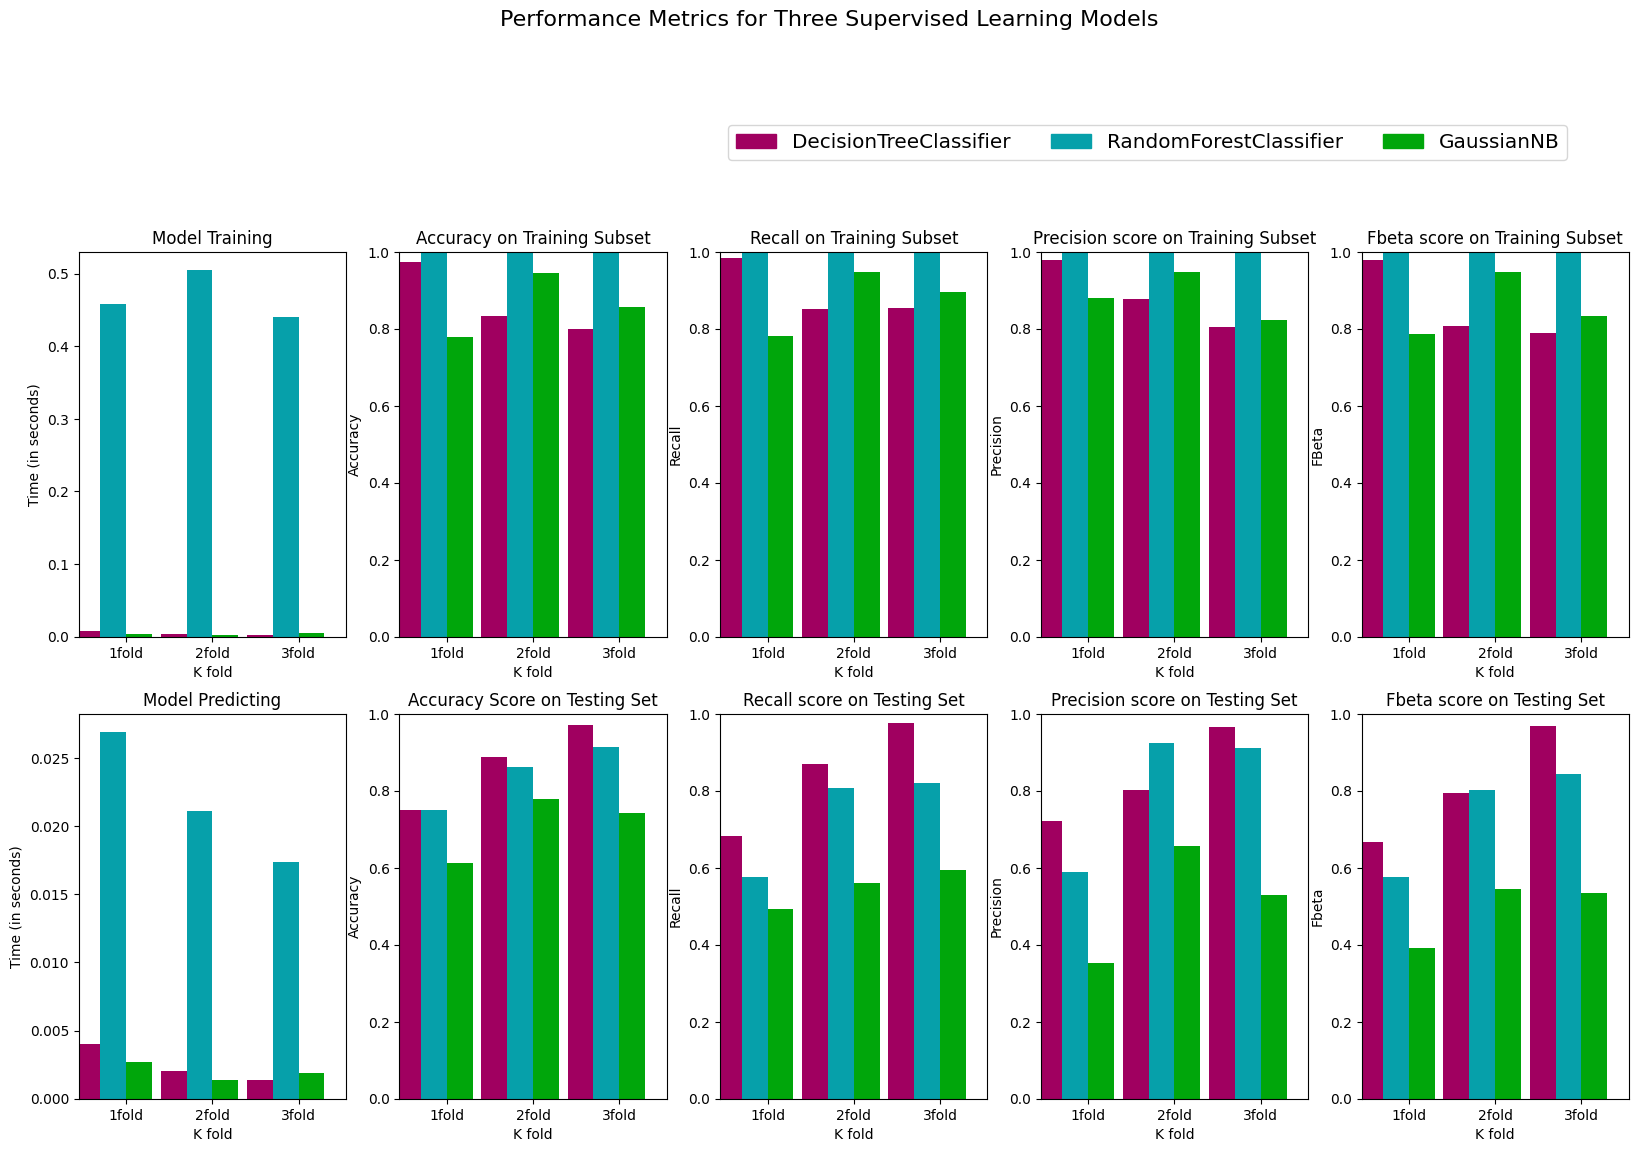

In [ ]:
# use the evaluate function to plot the performance of the traing and validation set for the three groups of folds
evaluate(results)

The performance of the model can be diveded into two broad categories:

##### **Duration of Training and Testing**
From the three models trained the **Random Forest classifier** had the highest duration for both training and testing. **DecisionTree classifier** had the lowest duration.


##### **Performance of Validation sample against test sample**
Considering the other four metrics in the graph above i.e Acurracy, recall, precision and fbeta score

- GaussianNaiveBayes (GNB) shows signs of the model overfitting. GNB is a good algorithm that performs very well in instances where the data size is small.In this usecase, the performance of the model on the sample training data is significantly higher than the test data. this means that the model is either overfitting.
Training the model with more data can reduce overfitting. However we will be dropping this model as the data available is limited.

- RandomForestClassifier (RFC): The RFC showed the possibility of overfitting on the firest fold, however, the accuracy and precision of the second and third fold are quite ok.

- DecisionTree (DT): The DT algorithm performed similarly to the RFC.

Both RFC and DT will be analyzed further and trained on 75% of the dataset. The data splitting will be carried out in a stratified manner based on the class. This stratified splitting will ensure that all classes are represented in both the train and test data. Since the data is not arranged in any format, the data is not shuffled for splitting.


In [ ]:
def feature_plot(importances, X_train, y_train):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

Training time: 0.3137 	 prediction time 0.0001
Accuracy: 0.96, 	 recall: 0.93 	 precision:0.97 	fbeta_score: 0.9446153846153846


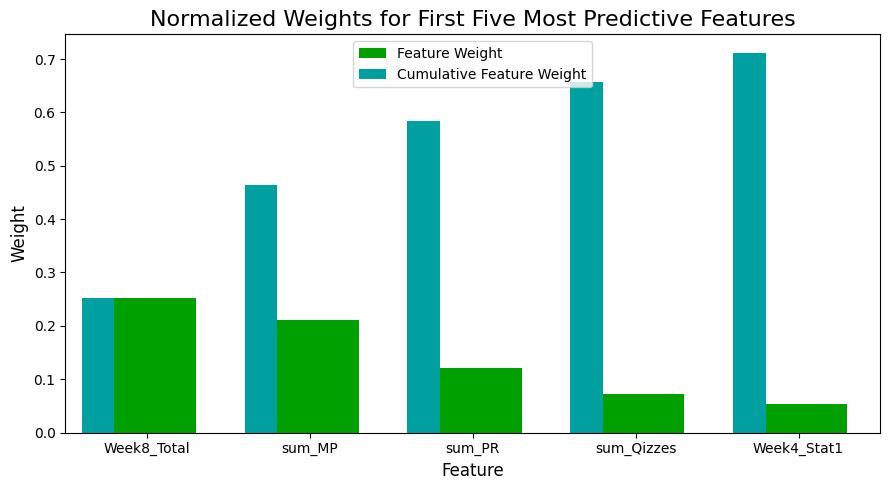

In [ ]:
# Retrain the model with random forest classifier including the week8_total score
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,shuffle= True, test_size=0.25,stratify=y,random_state=12)

model = RandomForestClassifier(n_estimators = 200, random_state = 0,max_depth=3, class_weight='balanced')

start = time()
model.fit(X_train, y_train)
end = time()
training_time = end - start

start = time()
RFy_pred = model.predict(X_test)
tend = time()
pred_time = start-end

accuracy = accuracy_score(y_test,RFy_pred)
precision = precision_score(y_test,RFy_pred, average='macro')
recall = recall_score(y_test,RFy_pred, average='macro')
fbeta = fbeta_score(y_test,RFy_pred, beta = 1.0, average='macro')

print(f"Training time: {training_time:.4f} \t prediction time {pred_time:.4f}")
print(f"Accuracy: {accuracy:.2f}, \t recall: {recall:.2f} \t precision:{precision:.2f} \tfbeta_score: {fbeta}")
importance = model.feature_importances_

feature_plot(importance, X_train, y_train)



Training time: 0.5004 	 prediction time 0.0001
Accuracy: 0.82, 	 recall: 0.65 	 precision:0.65 	fbeta_score: 0.6266666666666666


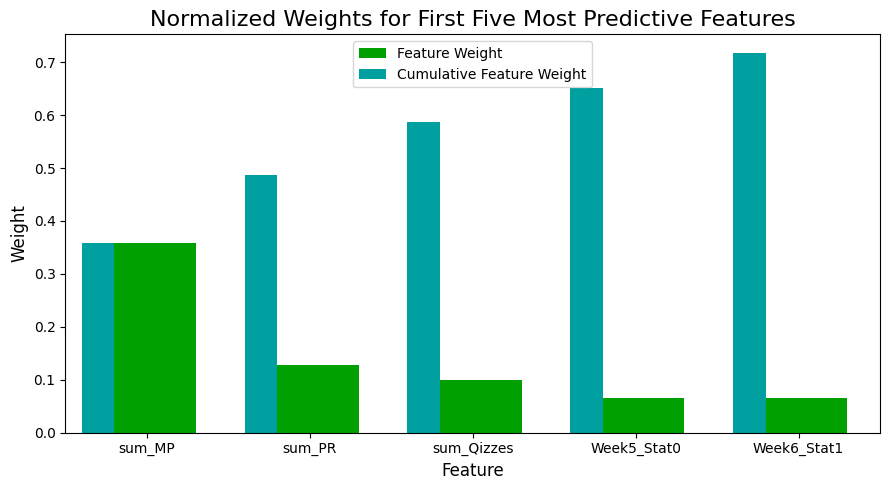

In [ ]:
#Retrain the model without the week8_total score with Random Forest classifier
X_train, X_test, y_train, y_test = train_test_split(X_normalized.drop(['Week8_Total'], axis=1, inplace=False), y,shuffle= True, test_size=0.20,stratify=y,random_state=0)

model = RandomForestClassifier(n_estimators = 300, random_state = 0,max_depth=6)

start = time()
model.fit(X_train, y_train)
end = time()
training_time = end - start

start = time()
RFy_pred = model.predict(X_test)
tend = time()
pred_time = start-end

accuracy = accuracy_score(y_test,RFy_pred)
precision = precision_score(y_test,RFy_pred, average='macro')
recall = recall_score(y_test,RFy_pred, average='macro')
fbeta = fbeta_score(y_test,RFy_pred, beta = 1.0, average='macro')

print(f"Training time: {training_time:.4f} \t prediction time {pred_time:.4f}")
print(f"Accuracy: {accuracy:.2f}, \t recall: {recall:.2f} \t precision:{precision:.2f} \tfbeta_score: {fbeta}")
importance = model.feature_importances_

feature_plot(importance, X_train, y_train)



In [ ]:
# confusion matrix of the predicted test data. RFC performed well in predicting grades 0,2, and 3
pd.crosstab(y_test,RFy_pred,rownames=['actual Grades'], colnames=['RF_predicted Grades'])

RF_predicted Grades,0,3,4,5
actual Grades,,,,
0,10,0,0,0
2,0,1,0,0
3,0,3,0,0
4,0,2,3,0
5,0,0,1,2


Training time: 0.00 	 prediction time 0.00
Accuracy: 1.00, 	 recall: 1.00 	 precision:1.00 	fbeta_score: 1.0


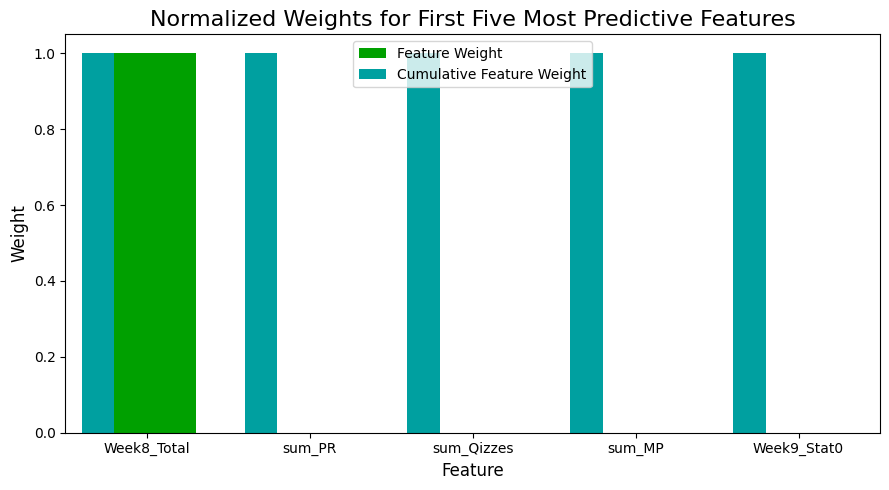

In [ ]:
# Traning the model with decision Tree
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y,shuffle= True, test_size=0.25,stratify=y,random_state=12)

model = DecisionTreeClassifier(max_depth=3,random_state=4)

start = time()
model.fit(X_train, y_train)
end = time()
training_time = end - start

start = time()
DTy_pred = model.predict(X_test)
tend = time()
pred_time = start-end

accuracy = accuracy_score(y_test,DTy_pred)
precision = precision_score(y_test,DTy_pred, average='macro')
recall = recall_score(y_test,DTy_pred, average='macro')
fbeta = fbeta_score(y_test,DTy_pred, beta = 1.0, average='macro')

print(f"Training time: {training_time:.2f} \t prediction time {pred_time:.2f}")
print(f"Accuracy: {accuracy:.2f}, \t recall: {recall:.2f} \t precision:{precision:.2f} \tfbeta_score: {fbeta}")
importance = model.feature_importances_

feature_plot(importance, X_train, y_train)

Training time: 0.00 	 prediction time 0.00
Accuracy: 0.86, 	 recall: 0.85 	 precision:0.78 	fbeta_score: 0.7880952380952381


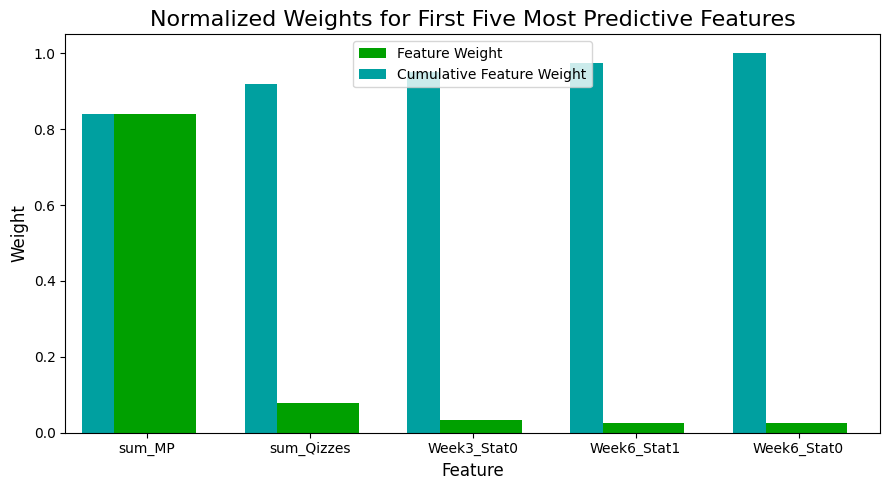

In [ ]:
# Retrain the model without the week8_total score with DT
X_train, X_test, y_train, y_test = train_test_split(X_normalized.drop(['Week8_Total'], axis=1, inplace=False), y, test_size=0.20,stratify=y,random_state=10)

model = DecisionTreeClassifier(max_depth=6,random_state=5)

start = time()
model.fit(X_train, y_train)
end = time()
training_time = end - start

start = time()
DTy_pred = model.predict(X_test)
tend = time()
pred_time = start-end

accuracy = accuracy_score(y_test,DTy_pred)
precision = precision_score(y_test,DTy_pred, average='macro')
recall = recall_score(y_test,DTy_pred, average='macro')
fbeta = fbeta_score(y_test,DTy_pred, beta = 1.0, average='macro')

print(f"Training time: {training_time:.2f} \t prediction time {pred_time:.2f}")
print(f"Accuracy: {accuracy:.2f}, \t recall: {recall:.2f} \t precision:{precision:.2f} \tfbeta_score: {fbeta}")
importance = model.feature_importances_

feature_plot(importance, X_train, y_train)

In [ ]:
# confusion matrix of the predicted test data. DT performed well in predicting grades 0,2, and 5

pd.crosstab(y_test,DTy_pred,rownames=['actual Grades'], colnames=['DT_predicted Grades'])

DT_predicted Grades,0,2,3,4,5
actual Grades,,,,,
0,10,0,0,0,0
2,0,1,0,0,0
3,0,1,2,0,0
4,0,0,1,3,1
5,0,0,0,0,3


#### References
- https://medium.com/@algopoint.ltd/machine-learning-introduction-to-statistical-learning-theory-feature-extraction-selection-3d3604960ecb

- https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

- Metrics:  https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/#:~:text=There%20isn't%20a%20single,while%20MAE%20is%20more%20robust.

- https://machinelearningmastery.com/fbeta-measure-for-machine-learning/
- https://www.evidentlyai.com/classification-metrics/multi-class-metrics
- https://scikit-learn.org/stable/modules/
-